In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('/home/gray/Desktop/dataset/IRIS.csv')
dataset.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
X = dataset.iloc[:, [1, 2, 3, 4]]
X.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


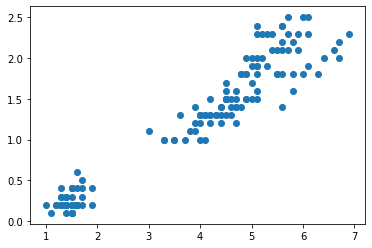

In [4]:
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'])

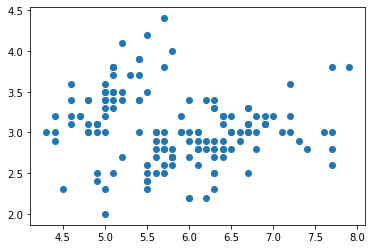

In [5]:
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'])

In [6]:
Y = dataset.iloc[:, [5]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [7]:
np.unique(Y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
def distance(x, y):
    dis = np.linalg.norm(x-y)
    return dis

In [9]:
def normalisation(X):
    mean = np.mean(X)
    std = np.std(X)
    return((X-mean)/std)

In [10]:
X_train_n = normalisation(X_train)
X_test_n = normalisation(X_test)

In [11]:
X_train_n = np.array(X_train_n)
X_test_n = np.array(X_test_n)

In [12]:
def K_Neighbors(data_train, main, K_val):
    distances = list()
    for train_row in data_train:
        dis = distance(train_row, main)
        distances.append((train_row, dis))
        
    distances.sort(key=lambda tup: tup[1])
    
    k_neighbors = list()
    
    for i in range(K_val):
        k_neighbors.append(distances[i][0])
    
    return k_neighbors

In [13]:
def prediction(data_train, datatest, K_val):
    Y_pred = list()
    
    for i in range(len(datatest)):
        neighbors = K_Neighbors(data_train, datatest[i], K_val)
        output_values = [row[-1] for row in neighbors]
        prediction = max(set(output_values), key=output_values.count)
        Y_pred.append(prediction)
    
    return Y_pred

In [14]:
X_train_fin = X_train_n[:, [0,1]]
class_map = {label: idx for idx,label in enumerate(np.unique(Y_train['Species']))}
class_map
Y_train['Species'] = Y_train['Species'].map(class_map)
Y_test['Species'] = Y_test['Species'].map(class_map)


/home/gray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/gray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
Y_train1 = np.array(Y_train)
X_train_final = np.hstack((X_train_fin, Y_train1))
X_test_fin = X_test_n[:, [0,1]]
Y_test1 = np.array(Y_test)
X_test_final = np.hstack((X_test_fin, Y_test1))

In [16]:
Y_pred = prediction(X_train_final, X_test_final, 5)
Y_pred

[1.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0]

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_n, Y_train)

print('The accuracy of the knn classifier is {:.4f} out of 1 on training data'.format(knn.score(X_train_n, Y_train)))
print('The accuracy of the knn classifier is {:.4f} out of 1 on test data'.format(knn.score(X_test_n, Y_test)))

The accuracy of the knn classifier is 0.9643 out of 1 on training data
The accuracy of the knn classifier is 0.9737 out of 1 on test data


/home/gray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [18]:
y_pred_sklearn = knn.predict((X))